In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


In [2]:
df=pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.shape

(20640, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

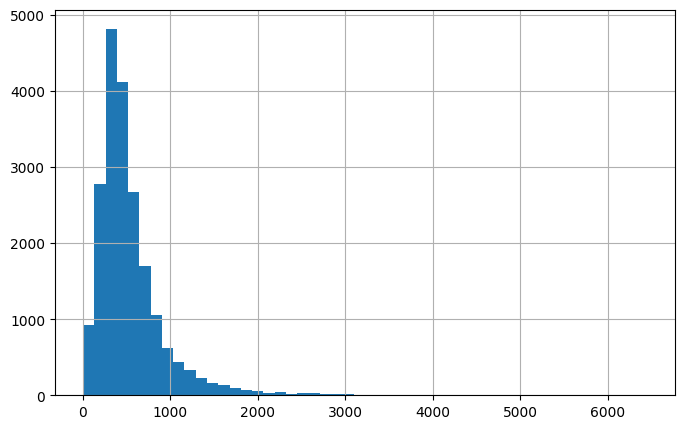

In [8]:
df['total_bedrooms'].hist(bins=50,figsize=(8,5))
plt.show()

In [9]:
print('Skewness:',df['total_bedrooms'].skew())

Skewness: 3.459546331523342


In [10]:
df['total_bedrooms']=df['total_bedrooms'].fillna(df['total_bedrooms'].median())


In [11]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

**Dataset Visualization**

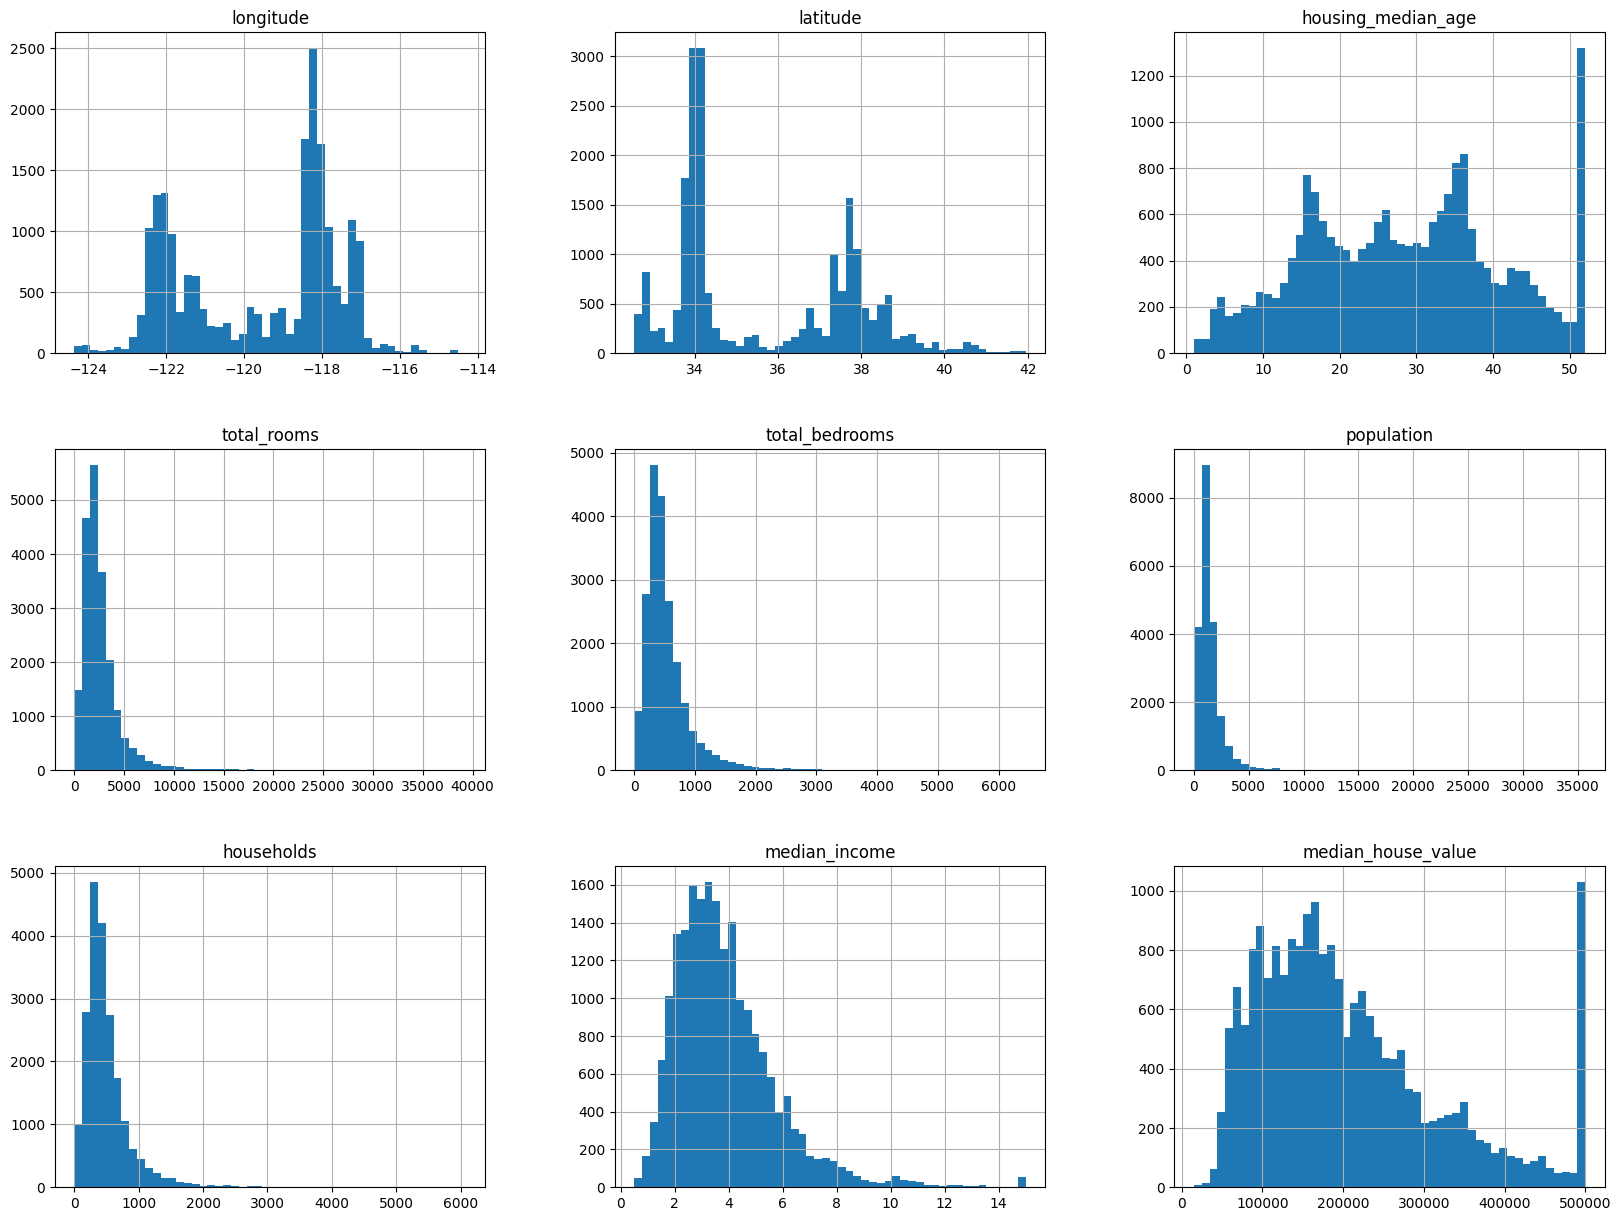

In [12]:
#plot histogram for all numeric features
df.hist(bins=50,figsize=(20,15))
plt.show()

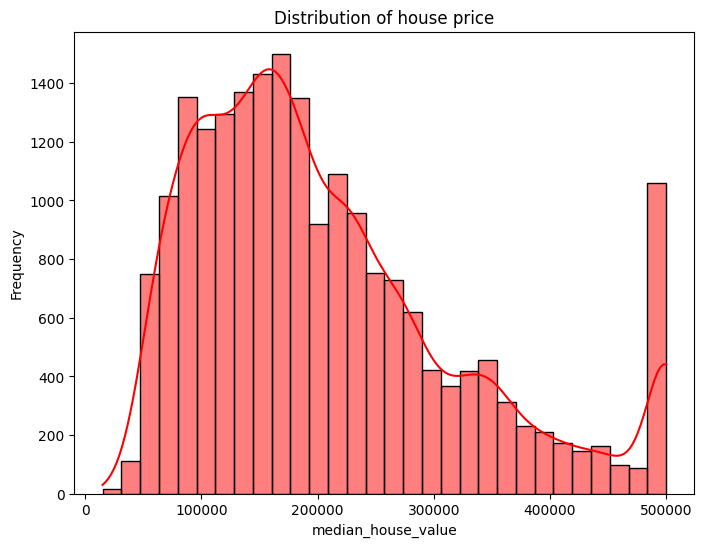

In [13]:
import warnings 
warnings.filterwarnings('ignore')
plt.figure(figsize=(8,6))
sns.histplot(df['median_house_value'],bins=30,kde=True,color='red',edgecolor='black')
plt.title('Distribution of house price')
plt.xlabel('median_house_value')
plt.ylabel('Frequency')
plt.show()

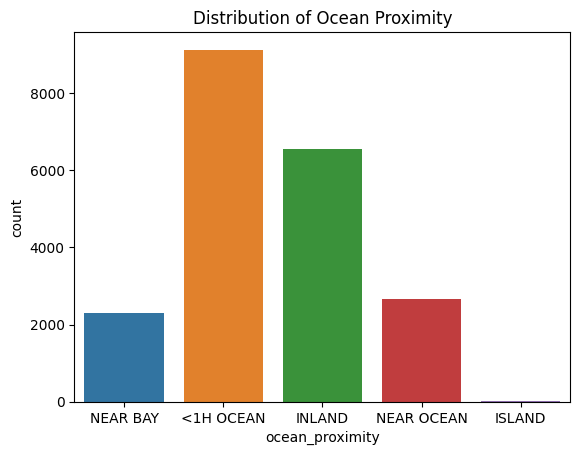

In [14]:
sns.countplot(x="ocean_proximity",data=df)
plt.title('Distribution of Ocean Proximity')
plt.show()

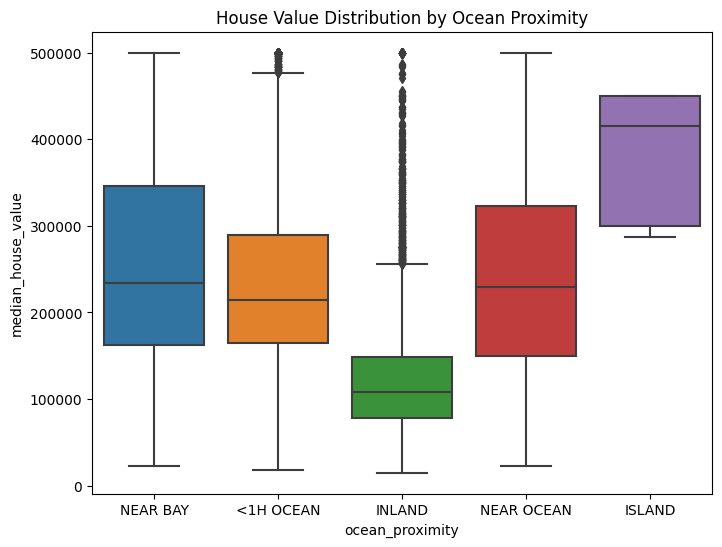

In [15]:
plt.figure(figsize=(8,6))
sns.boxplot(x='ocean_proximity',y='median_house_value',data=df)
plt.title('House Value Distribution by Ocean Proximity')
plt.show()

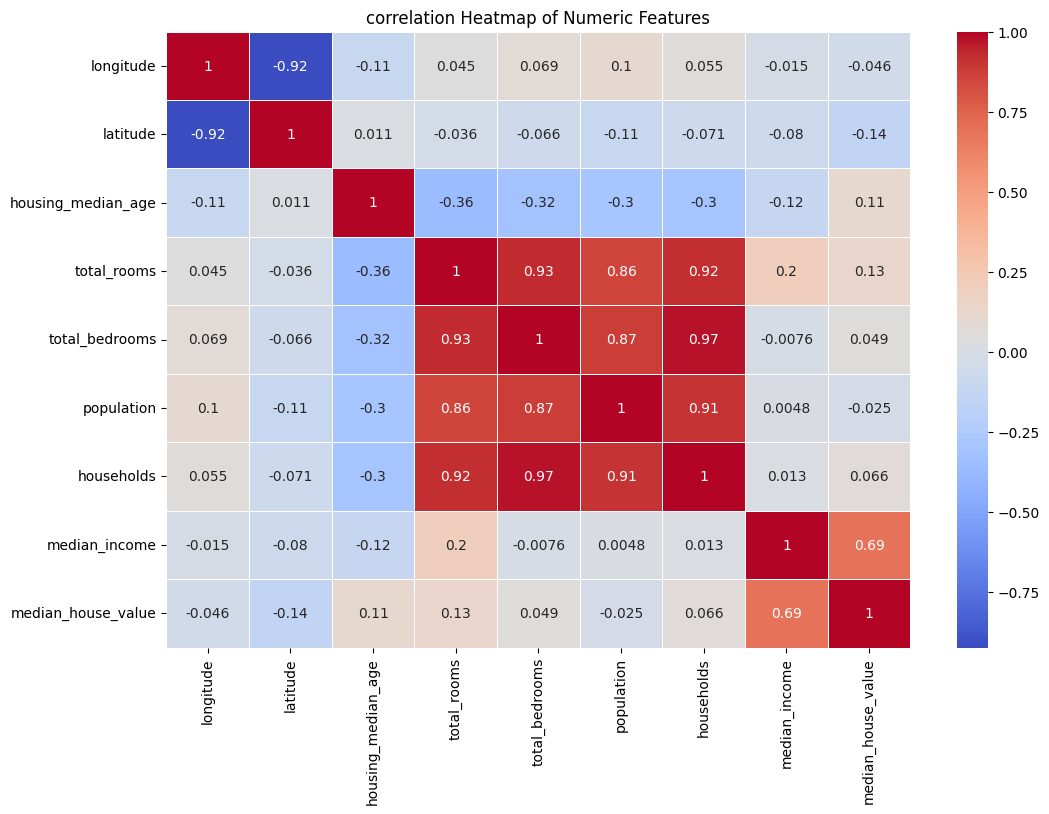

In [16]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm',linewidth=0.5)
plt.title('correlation Heatmap of Numeric Features')
plt.show()

In [17]:
df['ocean_proximity'].value_counts()


ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [18]:

df=pd.get_dummies(df,columns=['ocean_proximity'],drop_first=True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


**Train_test_split data**

In [19]:
x=df.drop(columns=['median_house_value'],axis=1)
y=df['median_house_value']

In [20]:
x.shape,y.shape

((20640, 12), (20640,))

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.fit_transform(x_test)

**Model-1: Linear Regression**

In [23]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train_scaled,y_train)

LinearRegression()

In [24]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score


y_pred_train=model.predict(x_train_scaled)

mae=mean_absolute_error(y_train,y_pred_train)
mse=mean_squared_error(y_train,y_pred_train)
r2=r2_score(y_train,y_pred_train)

print('mean absolute error:',round(mae,2))
print('mean squared error:',round(mse,2))
print('r2 score:',round(r2,2))

mean absolute error: 49594.84
mean squared error: 4683203783.5
r2 score: 0.65


In [25]:
y_pred_test=model.predict(x_test_scaled)

mae=mean_absolute_error(y_test,y_pred_test)
mse=mean_squared_error(y_test,y_pred_test)
r2=r2_score(y_test,y_pred_test)

print('mean absolute error:',round(mae,2))
print('mean squared error:',round(mse,2))
print('r2 score:',round(r2,2))

mean absolute error: 51083.74
mean squared error: 4917037588.69
r2 score: 0.62


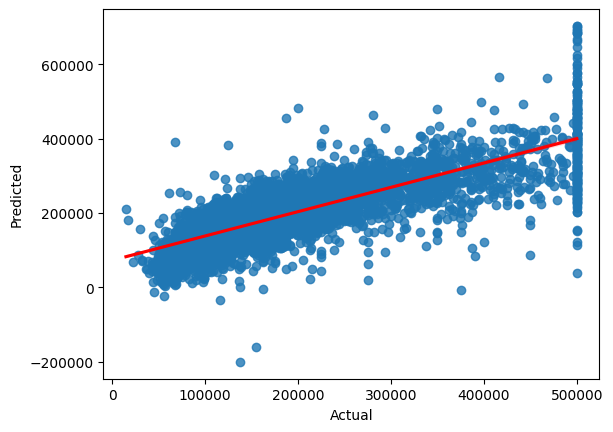

In [26]:
sns.regplot(x=y_test,y=y_pred_test,line_kws= {'color':'red'})
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [27]:
#ridge regression 
from sklearn.linear_model import Ridge
#create Ridge model 
ridge=Ridge(alpha=1000)
ridge.fit(x_train_scaled,y_train)



Ridge(alpha=1000)

In [28]:
y_pred_train=model.predict(x_train_scaled)

mae=mean_absolute_error(y_train,y_pred_train)
mse=mean_squared_error(y_train,y_pred_train)
r2=r2_score(y_train,y_pred_train)

print('mean absolute error:',round(mae,2))
print('mean squared error:',round(mse,2))
print('r2 score:',round(r2,2))

mean absolute error: 49594.84
mean squared error: 4683203783.5
r2 score: 0.65


In [29]:
y_pred_test=model.predict(x_test_scaled)

mae=mean_absolute_error(y_test,y_pred_test)
mse=mean_squared_error(y_test,y_pred_test)
r2=r2_score(y_test,y_pred_test)

print('mean absolute error:',round(mae,2))
print('mean squared error:',round(mse,2))
print('r2 score:',round(r2,2))

mean absolute error: 51083.74
mean squared error: 4917037588.69
r2 score: 0.62


**Model-2: Support Vector Machine**

In [30]:
from sklearn.svm import SVR
svr=SVR(kernel='sigmoid',C=200,gamma=0.1,epsilon=0.1)
svr.fit(x_train_scaled,y_train)

SVR(C=200, gamma=0.1, kernel='sigmoid')

In [31]:
y_pred_train=svr.predict(x_train_scaled)

mae=mean_absolute_error(y_train,y_pred_train)
mse=mean_squared_error(y_train,y_pred_train)
r2=r2_score(y_train,y_pred_train)

print('mean absolute error:',round(mae,2))
print('mean squared error:',round(mse,2))
print('r2 score:',round(r2,2))

mean absolute error: 59015.81
mean squared error: 7083578333.28
r2 score: 0.47


In [32]:
y_pred_test=svr.predict(x_test_scaled)

mae=mean_absolute_error(y_test,y_pred_test)
mse=mean_squared_error(y_test,y_pred_test)
r2=r2_score(y_test,y_pred_test)

print('mean absolute error:',round(mae,2))
print('mean squared error:',round(mse,2))
print('r2 score:',round(r2,2))

mean absolute error: 58435.35
mean squared error: 7015664369.85
r2 score: 0.46


In [33]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(max_depth=10,min_samples_split=10,min_samples_leaf=4,random_state=42)
model.fit(x_train_scaled,y_train)

DecisionTreeRegressor(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                      random_state=42)

In [34]:
y_pred_train=model.predict(x_train_scaled)

mae=mean_absolute_error(y_train,y_pred_train)
mse=mean_squared_error(y_train,y_pred_train)
r2=r2_score(y_train,y_pred_train)

print('mean absolute error:',round(mae,2))
print('mean squared error:',round(mse,2))
print('r2 score:',round(r2,2))

mean absolute error: 34130.37
mean squared error: 2481412311.08
r2 score: 0.81


In [35]:
y_pred_test=model.predict(x_test_scaled)

mae=mean_absolute_error(y_test,y_pred_test)
mse=mean_squared_error(y_test,y_pred_test)
r2=r2_score(y_test,y_pred_test)

print('mean absolute error:',round(mae,2))
print('mean squared error:',round(mse,2))
print('r2 score:',round(r2,2))

mean absolute error: 47676.16
mean squared error: 4860878181.15
r2 score: 0.63


In [36]:
from sklearn.model_selection import GridSearchCV

params = {
    'max_depth': [3, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42),
                           param_grid=params,
                           cv=5,
                           scoring='r2',
                           n_jobs=-1)
grid_search.fit(x_train_scaled, y_train)

# Best model
best_tree = grid_search.best_estimator_
print("Best Params:", grid_search.best_params_)

# Evaluate best model
test_preds = best_tree.predict(x_test_scaled)
print("Best R2 Score on Test:", r2_score(y_test, test_preds))


Best Params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best R2 Score on Test: 0.6290564043845418


In [37]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=300,        # more trees, more robust
    max_depth=20,            # control overfitting
    min_samples_split=10,     # node must have at least 5 samples to split
    min_samples_leaf=5,      # leaf must have at least 2 samples
    max_features='sqrt',     # reduce correlation between trees
    random_state=42)
model.fit(x_train_scaled,y_train)


RandomForestRegressor(max_depth=20, max_features='sqrt', min_samples_leaf=5,
                      min_samples_split=10, n_estimators=300, random_state=42)

In [38]:
y_pred_train=model.predict(x_train_scaled)

mae=mean_absolute_error(y_train,y_pred_train)
mse=mean_squared_error(y_train,y_pred_train)
r2=r2_score(y_train,y_pred_train)

print('mean absolute error:',round(mae,2))
print('mean squared error:',round(mse,2))
print('r2 score:',round(r2,2))

mean absolute error: 25559.62
mean squared error: 1470004457.29
r2 score: 0.89


In [39]:
y_pred_test=model.predict(x_test_scaled)

mae=mean_absolute_error(y_test,y_pred_test)
mse=mean_squared_error(y_test,y_pred_test)
r2=r2_score(y_test,y_pred_test)

print('mean absolute error:',round(mae,2))
print('mean squared error:',round(mse,2))
print('r2 score:',round(r2,2))

mean absolute error: 39752.46
mean squared error: 3178473482.45
r2 score: 0.76


In [40]:
from xgboost import XGBRegressor
model = XGBRegressor(
    n_estimators=200,     # number of trees
    learning_rate=0.05,   # step size shrinkage
    max_depth=2,          # depth of each tree
    subsample=0.8,        # % of training data for each tree
    colsample_bytree=0.8, # % of features per tree
    random_state=42,
    reg_alpha=1,        # L1 regularization (lasso-like)
    reg_lambda=1,       # L2 regularization (ridge-like))
        
)
model.fit(x_train_scaled,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=2, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [41]:
# Predictions
y_train_pred = model.predict(x_train_scaled)
y_test_pred = model.predict(x_test_scaled)

# Metrics
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Train MSE:", mean_squared_error(y_train, y_train_pred))
print("Train R2:", r2_score(y_train, y_train_pred))

print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Test MSE:", mean_squared_error(y_test, y_test_pred))
print("Test R2:", r2_score(y_test, y_test_pred))

Train MAE: 42197.94148857649
Train MSE: 3568192228.6149154
Train R2: 0.7330752254079238
Test MAE: 59905.75639307776
Test MSE: 5650811816.935459
Test R2: 0.568774946542175


                       Feature  Importance
7                median_income    0.394258
8       ocean_proximity_INLAND    0.326553
2           housing_median_age    0.060747
0                    longitude    0.060736
11  ocean_proximity_NEAR OCEAN    0.037348
5                   population    0.030636
1                     latitude    0.024898
4               total_bedrooms    0.020792
3                  total_rooms    0.020480
6                   households    0.014593
10    ocean_proximity_NEAR BAY    0.008958
9       ocean_proximity_ISLAND    0.000000


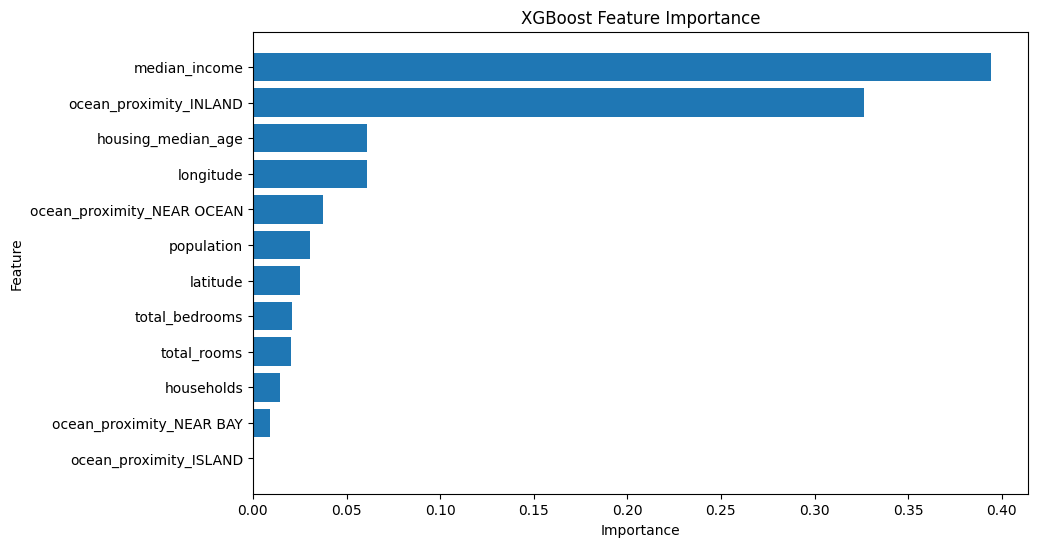

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importance scores
importances = model.feature_importances_

# Put them into a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.gca().invert_yaxis()  # Most important at top
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('XGBoost Feature Importance')
plt.show()


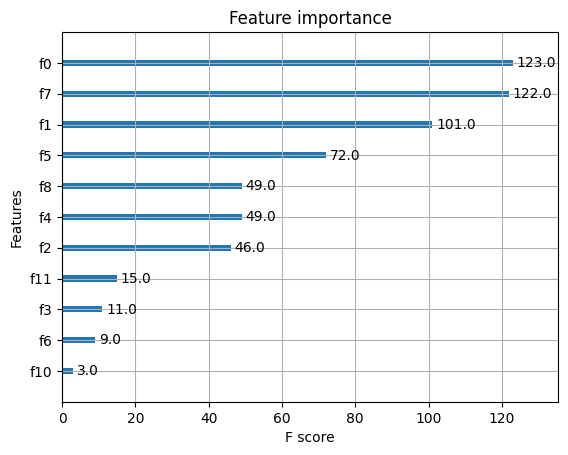

In [43]:
from xgboost import plot_importance

plot_importance(model, importance_type='weight')  # 'weight', 'gain', 'cover'
plt.show()


In [44]:
#Pick a threshold for importance
threshold = 0.02  # keep only features with importance > 2%

#  Get feature importances from your trained model
importances = model.feature_importances_
important_features = [feature for feature, importance in zip(x_train.columns, importances) if importance > threshold]

print("Selected features:", important_features)

#  Filter the datasets
x_train_selected = x_train[important_features]
x_test_selected = x_test[important_features]

#  Retrain the model with only selected features
from xgboost import XGBRegressor

model_selected = XGBRegressor(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    reg_alpha=0.5,
    reg_lambda=0.5
)

model_selected.fit(x_train_selected, y_train)

#  Evaluate again
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_test = model_selected.predict(x_test_selected)
print("MAE:", mean_absolute_error(y_test, y_pred_test))
print("MSE:", mean_squared_error(y_test, y_pred_test))
print("R2:", r2_score(y_test, y_pred_test))


Selected features: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'median_income', 'ocean_proximity_INLAND', 'ocean_proximity_NEAR OCEAN']
MAE: 36691.48035708878
MSE: 2884672415.868285
R2: 0.7798647243900385
